# Import software libraries and load the dataset #

In [29]:
# Import required libraries.
import sys                             # Read system parameters.
import shutil
import numpy as np                     # Work with multi-dimensional arrays and matrices.
from numpy.random import seed
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import sklearn                         # Perform data mining and analysis.
import tensorflow                      # Train neural networks for deep learning.
import keras                           # Provide a frontend for TensorFlow.
from keras import datasets

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- TensorFlow {}'.format(tensorflow.__version__))
print('- Keras {}\n'.format(keras.__version__))

# Load the dataset.
shutil.rmtree('/home/jovyan/.keras')
shutil.copytree('/home/jovyan/work/.keras', '/home/jovyan/.keras')
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
print('Loaded {} training records.'.format(len(X_train.data)))
print('Loaded {} test records.'.format(len(X_test.data)))

# Uncomment the following two lines to make outcomes deterministic. Supply whatever seed values you wish.
#seed(1)
#tensorflow.random.set_seed(1)

Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- NumPy 1.16.2
- Matplotlib 3.0.3
- scikit-learn 0.20.3
- TensorFlow 2.0.0
- Keras 2.3.1

Loaded 60000 training records.
Loaded 10000 test records.


# Get acquainted with the dataset

In [30]:
# Show dimensions of the training and testing sets and their labels
for sample, name in zip([X_train, y_train, X_test, y_test], ['traning (x)', 'training (y)', 'test (x)', 'test (y)']):
    print(f'The shape of {name} sample is {sample.shape}')

The shape of traning (x) sample is (60000, 28, 28)
The shape of training (y) sample is (60000,)
The shape of test (x) sample is (10000, 28, 28)
The shape of test (y) sample is (10000,)


# Visualize the data examples

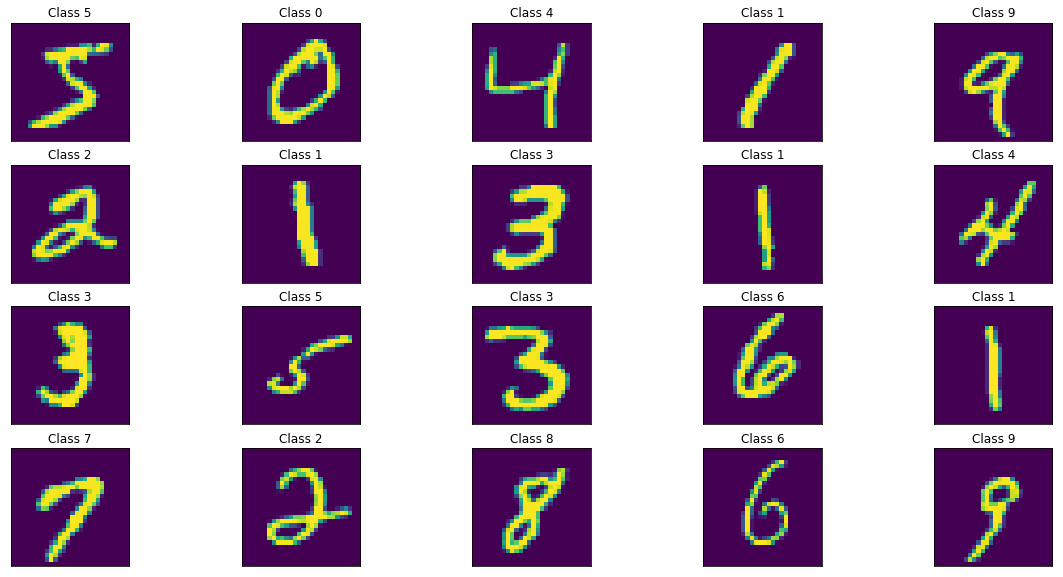

In [31]:
# Show a preview of the first 20 images
fig, axes = plt.subplots(4,5, figsize=(20,10))

for i, ax in zip(range(20), axes.flatten()):
    ax.imshow(X_train[i,:,:])
    ax.set_title(f'Class {y_train[i]}')

for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

# Prepare the data for training with Keras

In [32]:
# Reshape arrays to add greyscale flag.
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


from keras.utils import to_categorical
# One-hot encode the data for each label.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f'Exampe of the first image after one-hot encoding:', y_train[0] ,sep='\n')

Exampe of the first image after one-hot encoding:
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Split the datasets

In [33]:
# Split the training and validation datasets and their labels.
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42) 

for sample, name in zip([x_train, x_val, y_train, y_val], ['training features', 'validation features', 'training labels', 'validation labels']):
    print(f'The shape of {name} is {sample.shape}')

The shape of training features is (48000, 28, 28, 1)
The shape of validation features is (12000, 28, 28, 1)
The shape of training labels is (48000, 10)
The shape of validation labels is (12000, 10)


# Build the CNN structure

In [34]:
# Import the required libraries.
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers.advanced_activations import LeakyReLU

# Create the model.
cnn = Sequential()

# Add model layers as specified.
cnn.add(Conv2D(filters = 32,
               kernel_size = (3, 3), 
               input_shape = (28, 28, 1),
               padding = 'same',
               activation = 'linear'))  
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(MaxPooling2D((2, 2), padding = 'same')) 

cnn.add(Conv2D(64, (3, 3), padding = 'same', activation = 'linear'))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(MaxPooling2D((2, 2), padding = 'same'))

cnn.add(Conv2D(128, (3, 3), padding = 'same', activation = 'linear'))
cnn.add(LeakyReLU(alpha = 0.1))                  
cnn.add(MaxPooling2D((2, 2), padding = 'same'))

cnn.add(Flatten()) 
cnn.add(Dense(10, activation = 'softmax'))

# Compile the model and summarize the layers

In [37]:
# Compile the model.
#   - Use the adam optimizer.
#   - Use categorical_crossentropy for the loss function.
#   - Use accuracy to measure model performance.

cnn.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])

# Summarize the layers.
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

# Plot a graph of the model

In [38]:
# Install the required library.
!conda install --yes graphviz==2.40.1

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 25.1.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



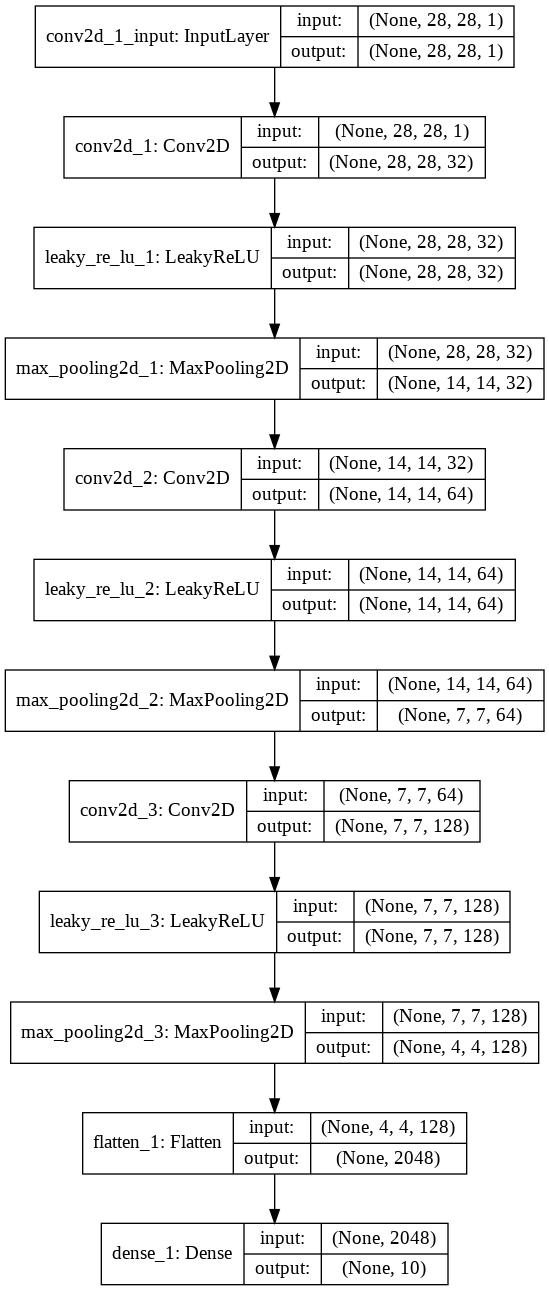

In [41]:
# Plot a graph of the model.
from keras.utils import plot_model

plot_model(cnn, show_shapes = True)

# Train the model

In [42]:
# Train the model over 1 epoch.
cnn_trained = cnn.fit(x_train, y_train, 
                      validation_data = (x_val, y_val),
                      epochs = 1, 
                      verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 94s 2ms/step - loss: 0.2751 - accuracy: 0.9511 - val_loss: 0.0630 - val_accuracy: 0.9812


# Evaluate the model on the test data

In [48]:
# Evaluate the model on the test data, showing loss and accuracy.
eval_test = cnn.evaluate(X_test, y_test)

print(f'Log loss is {round(eval_test[0], 2)}')
print(f'The accuracy is {round(eval_test[1], 2)}')

10000/10000 [==============================] - 5s 534us/step
Log loss is 0.06
The accuracy is 0.98


# Make predictions on the test data

In [51]:
# Make predictions on the test data.
prediction = cnn.predict(X_test)
prediction = np.argmax(np.round(prediction), axis=1)
actual = np.argmax(np.round(y_test), axis=1)

# Show the first 30 examples.
print(f'Predicted classes:', prediction[:31], sep='\n')
print(f'Actual classes:', actual[:31], sep='\n')

Predicted classes:
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3]
Actual classes:
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3]


# Visualize the predictions for 30 examples

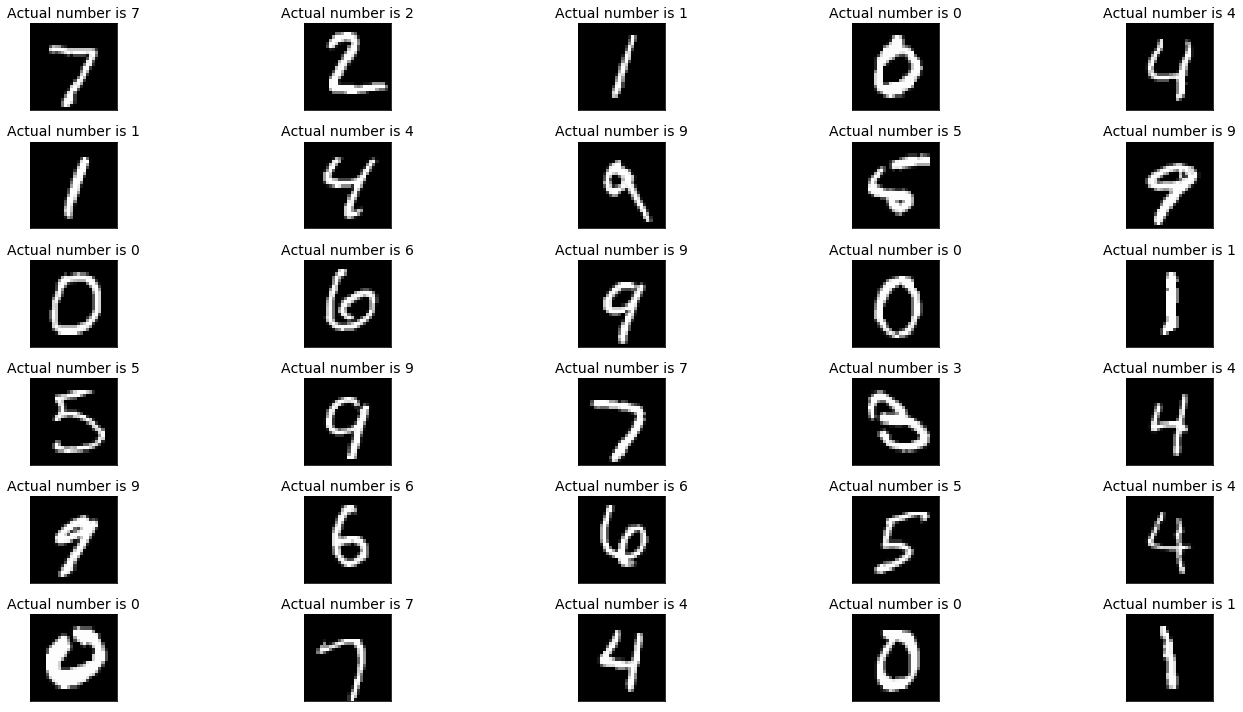

In [59]:
# Using the test set, show the first 30 predictions, highlighting any incorrect predictions in color.
fig, axes = plt.subplots(6, 5, figsize=(20,10))

for i, ax in zip(range(30), axes.flatten()):
    if prediction[i] == actual[i]:
        ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    else:
         ax.imshow(X_test[i].reshape(28, 28))
    ax.set_title(f"Actual number is {actual[i]}", fontsize= 14)

for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.tight_layout()